# Assignment 2

__Due date__: April 25, 2018 at 10 pm
__Submission__: IPython notebook to GauchoSpace

We have been building up to creating components for a dashboard app in Jupyter notebook:

- Data downloading function: `get_nba_data()` in a `03-Data-collection-and-manipulation.ipynb`. 
- Accessing pandas data frame and creating dictionary structures in `04-Pandas-Data-Frame.ipynb` and `05-Data-Frame-and-Visualization.ipynb`.
- Creating widgets for interactivity: `05-Data-Frame-and-Visualization.ipynb`.
- Plotting visualizations with Matplotlib and Seaborn: `05-Data-Frame-and-Visualization.ipynb`.

We can put these components together to create an interactive dashboard for creating something similar to the R package: https://github.com/toddwschneider/ballr

Your assignment is to create an interactive dashboard.

It doesn't have to be exactly the same as the package or what I have proposed. If you would like to create another visualization, that would be great as well. I will refer to __default option__ as continuing to do what we started in class: dashboard of shotchart similar to what [BallR package](https://github.com/toddwschneider/ballr) does. I will refer to __open-ended option__ as creating a dashboard of your choice.

Below, I specify some necessary components to your dashboard.

## Problem 1: Data Download

__Default option__: you can use the `get_nba_data()` function. No additional work is needed.

__Open-ended option__: you can choose to create a different dashboard. 

If you are familiar with http://stats.nba.com/, some stats pages will directly tell you how the data can be retrieved. For example, the data needed for [Tracking Shots Dashboard](http://stats.nba.com/player/201935/shots-dash/) comes from [this URL](http://stats.nba.com/stats/playerdashptshots?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PerMode=PerGame&Period=0&PlayerID=201935&Season=2017-18&SeasonSegment=&SeasonType=Playoffs&TeamID=0&VsConference=&VsDivision=). This link can be found under Tools > Developer tools menu (Control-Shift-I) if you are using [Google Chrome](https://www.google.com/chrome/). Once you open Developer tools, you need to reload the page (for F5). Then, go to `Networks` menu under Developer tools pane. Type into the `Filter` text input box, type `stats/`. This will find (if any) GET URL links that we can use. The URL corresponding to the [Tracking Shots Dashboard](http://stats.nba.com/player/201935/shots-dash/) is [here](http://stats.nba.com/stats/playerdashptshots?DateFrom=&DateTo=&GameSegment=&LastNGames=0&LeagueID=00&Location=&Month=0&OpponentTeamID=0&Outcome=&PerMode=PerGame&Period=0&PlayerID=201935&Season=2017-18&SeasonSegment=&SeasonType=Playoffs&TeamID=0&VsConference=&VsDivision=). If you are feeling adventurous, you can use another data to create your dashboard with.

There are other interesting data sources: https://schoolofdata.org/2013/11/18/web-apis-for-non-programmers/ (note them some may be out of date since this is from 5 years ago!). If you would like to pursue a completely different data source, you are encouraged to. Keep in mind you want to create some dashboard to automatically update information. I can help you to determine wheter a site can be reverse engineered relatively easily if you choose to pursue this option.

Determine the set of parameters for creating an appropriate `param` dictionary. Test if your data download function works as intended.

## Problem 2: Creating interactive widgets

__Default option__: create at least one more widgets (three total) for specifying data downloads. For example, you can change year, opposing team, etc.

__Open-ended option__: create at least one widget for specifying data downloads.

In this problem, you will simply create widget(s). Next section will be showing how you can combine them.

## Problem 3: Downloading data with changing widget states

__Both options__: Add event handlers (`observe`, `on_click`, etc) to be called when some widget changes to another state. Make sure this works as expected.

## Problem 4: Data transformation and visualization

__Default option__: create at least two data transformation using split-apply-combine approach. Some ideas are, 

- What is the shooting average against different teams? You would split based on opposing team, compute the average, and plot a bar chart. 

- What is the shooting average over different periods per game? You would split based on periods and game, then plot the changing shooting average over periods. Is this helpful? Why? Why not?

- Any other setting in which you would need to split-apply-combine to calculate a summary statistic.

- A setting of your choosing

Plot your result

__Open-ended option__: create at least one data transformation using split-apply-combine approach.

Plot your result

## Notes

- Open-ended option will be a lot more work; however, you can use this towards building up your final projects if you so choose. 

- Label figures, and explain your steps. PSTAT 234 students' work are expected to be more refined.

- Exceptional assignments will receive extra credit.

### Basketball Court for Shot Charts

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

## code is from http://savvastjortjoglou.com/nba-shot-sharts.html
def draw_court(ax=None, color='black', lw=1, outer_lines=False):
    
    from matplotlib.patches import Circle, Rectangle, Arc
    from matplotlib.pyplot import gca
    
    # If an axes object isn't provided to plot onto, just get current one
    if ax is None:
        ax = gca()

    # Create the various parts of an NBA basketball court

    # Create the basketball hoop
    # Diameter of a hoop is 18" so it has a radius of 9", which is a value
    # 7.5 in our coordinate system
    hoop = Circle((0, 0), radius=7.5, linewidth=lw, color=color, fill=False)

    # Create backboard
    backboard = Rectangle((-30, -7.5), 60, 0, linewidth=lw, color=color)

    # The paint
    # Create the outer box 0f the paint, width=16ft, height=19ft
    outer_box = Rectangle((-80, -47.5), 160, 190, linewidth=lw, color=color,
                          fill=False)
    # Create the inner box of the paint, widt=12ft, height=19ft
    inner_box = Rectangle((-60, -47.5), 120, 190, linewidth=lw, color=color,
                          fill=False)

    # Create free throw top arc
    top_free_throw = Arc((0, 142.5), 120, 120, theta1=0, theta2=180,
                         linewidth=lw, color=color, fill=False)
    # Create free throw bottom arc
    bottom_free_throw = Arc((0, 142.5), 120, 120, theta1=180, theta2=0,
                            linewidth=lw, color=color, linestyle='dashed')
    # Restricted Zone, it is an arc with 4ft radius from center of the hoop
    restricted = Arc((0, 0), 80, 80, theta1=0, theta2=180, linewidth=lw,
                     color=color)

    # Three point line
    # Create the side 3pt lines, they are 14ft long before they begin to arc
    corner_three_a = Rectangle((-219, -47.5), 0, 140, linewidth=lw,
                               color=color)
    corner_three_b = Rectangle((219, -47.5), 0, 140, linewidth=lw, color=color)
    # 3pt arc - center of arc will be the hoop, arc is 23'9" away from hoop
    # I just played around with the theta values until they lined up with the 
    # threes
    three_arc = Arc((0, 0), 475, 475, theta1=22.5, theta2=157.5, linewidth=lw,
                    color=color)

    # Center Court
    center_outer_arc = Arc((0, 422.5), 120, 120, theta1=180, theta2=0,
                           linewidth=lw, color=color)
    center_inner_arc = Arc((0, 422.5), 40, 40, theta1=180, theta2=0,
                           linewidth=lw, color=color)

    # List of the court elements to be plotted onto the axes
    court_elements = [hoop, backboard, outer_box, inner_box, top_free_throw,
                      bottom_free_throw, restricted, corner_three_a,
                      corner_three_b, three_arc, center_outer_arc,
                      center_inner_arc]

    if outer_lines:
        # Draw the half court line, baseline and side out bound lines
        outer_lines = Rectangle((-250, -47.5), 500, 470, linewidth=lw,
                                color=color, fill=False)
        court_elements.append(outer_lines)

    # Add the court elements onto the axes
    for element in court_elements:
        ax.add_patch(element)

    return ax

plt.figure(figsize=(12,11))
draw_court(outer_lines=True)
plt.xlim(-300,300)
plt.ylim(-100,500)
plt.show()

### Problem 1

In [2]:
import pandas as pd

def get_nba_data(endpt, params, return_url=False):

    ## endpt: https://github.com/seemethere/nba_py/wiki/stats.nba.com-Endpoint-Documentation
    ## params: dictionary of parameters: i.e., {'LeagueID':'00'}
    
    from pandas import DataFrame
    from urllib.parse import urlencode
    import json
    
    useragent = "\"Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2) AppleWebKit/601.3.9 (KHTML, like Gecko) Version/9.0.2 Safari/601.3.9\""
    dataurl = "\"" + "http://stats.nba.com/stats/" + endpt + "?" + urlencode(params) + "\""
    
    # for debugging: just return the url
    if return_url:
        return(dataurl)
    
    jsonstr = !wget -q -O - --user-agent={useragent} {dataurl}
    
    data = json.loads(jsonstr[0])
    
    h = data['resultSets'][0]['headers']
    d = data['resultSets'][0]['rowSet']
    
    return(DataFrame(d, columns=h))

In [3]:
## get all teams
params = {'LeagueID':'00'}
teams = get_nba_data('commonTeamYears', params)

## get all players
params = {'LeagueID':'00', 'Season': '2017-18', 'IsOnlyCurrentSeason': '0'}
players = get_nba_data('commonallplayers', params)

### Problem 2

In [4]:
from ipywidgets import interact, FloatSlider, Dropdown, Button, interactive

Do .head() on teams and players to ensure all the data was successfully drawn

In [7]:
teams.head()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION
0,00,1610612737,1949,2017,ATL
1,00,1610612738,1946,2017,BOS
2,00,1610612739,1970,2017,CLE
3,00,1610612740,2002,2017,NOP
4,00,1610612741,1966,2017,CHI


In [8]:
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


Add abbreviations and proper capitalized team code to the teams data frame

In [9]:
team_names = players[['TEAM_ABBREVIATION', 'TEAM_CODE']].drop_duplicates()#.set_index('TEAM_ABBREVIATION')
team_names.head()

,TEAM_ABBREVIATION,TEAM_CODE
0,,
9,OKC,thunder
14,BKN,nets
22,MIA,heat
25,ORL,magic


In [10]:
teams = pd.merge(teams, team_names, left_on='ABBREVIATION', right_on='TEAM_ABBREVIATION')
teams.tail()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_ABBREVIATION,TEAM_CODE
25,00,1610612762,1974,2017,UTA,UTA,jazz
26,00,1610612763,1995,2017,MEM,MEM,grizzlies
27,00,1610612764,1961,2017,WAS,WAS,wizards
28,00,1610612765,1948,2017,DET,DET,pistons
29,00,1610612766,1988,2017,CHA,CHA,hornets


In [11]:
teams.TEAM_CODE = teams.TEAM_CODE.str.capitalize() # returns values so needs to be reassigned
teams.sort_values('ABBREVIATION', inplace=True)    # modifies object
teams.tail()

,LEAGUE_ID,TEAM_ID,MIN_YEAR,MAX_YEAR,ABBREVIATION,TEAM_ABBREVIATION,TEAM_CODE
21,00,1610612758,1948,2017,SAC,SAC,Kings
22,00,1610612759,1976,2017,SAS,SAS,Spurs
24,00,1610612761,1995,2017,TOR,TOR,Raptors
25,00,1610612762,1974,2017,UTA,UTA,Jazz
27,00,1610612764,1961,2017,WAS,WAS,Wizards


### Widgets created in lecture:

In [12]:
team_dd_text = teams.TEAM_ABBREVIATION+', '+teams.TEAM_CODE
team_dd = dict(zip(team_dd_text, teams.TEAM_ID))
team_dd

{'ATL, Hawks': 1610612737,
 'BKN, Nets': 1610612751,
 'BOS, Celtics': 1610612738,
 'CHA, Hornets': 1610612766,
 'CHI, Bulls': 1610612741,
 'CLE, Cavaliers': 1610612739,
 'DAL, Mavericks': 1610612742,
 'DEN, Nuggets': 1610612743,
 'DET, Pistons': 1610612765,
 'GSW, Warriors': 1610612744,
 'HOU, Rockets': 1610612745,
 'IND, Pacers': 1610612754,
 'LAC, Clippers': 1610612746,
 'LAL, Lakers': 1610612747,
 'MEM, Grizzlies': 1610612763,
 'MIA, Heat': 1610612748,
 'MIL, Bucks': 1610612749,
 'MIN, Timberwolves': 1610612750,
 'NOP, Pelicans': 1610612740,
 'NYK, Knicks': 1610612752,
 'OKC, Thunder': 1610612760,
 'ORL, Magic': 1610612753,
 'PHI, Sixers': 1610612755,
 'PHX, Suns': 1610612756,
 'POR, Blazers': 1610612757,
 'SAC, Kings': 1610612758,
 'SAS, Spurs': 1610612759,
 'TOR, Raptors': 1610612761,
 'UTA, Jazz': 1610612762,
 'WAS, Wizards': 1610612764}

In [13]:
plyr_by_team_dd = dict()

for t, p in players.groupby('TEAM_ID'):
    
    plyr_by_team_dd[t] = dict(zip(p.DISPLAY_LAST_COMMA_FIRST, p.PERSON_ID))

plyr_by_team_dd

{0: {'Abdelnaby, Alaa': 76001,
  'Abdul-Aziz, Zaid': 76002,
  'Abdul-Jabbar, Kareem': 76003,
  'Abdul-Rauf, Mahmoud': 51,
  'Abdul-Wahad, Tariq': 1505,
  'Abdur-Rahim, Shareef': 949,
  'Abernethy, Tom': 76005,
  'Able, Forest': 76006,
  'Abramovic, John': 76007,
  'Acker, Alex': 101165,
  'Ackerman, Donald': 76008,
  'Acres, Mark': 76009,
  'Acton, Charles': 76010,
  'Adams, Alvan': 76011,
  'Adams, Don': 76012,
  'Adams, Hassan': 200801,
  'Adams, Jordan': 203919,
  'Adams, Michael': 149,
  'Addison, Rafael': 912,
  'Adelman, Rick': 76015,
  'Adrien, Jeff': 202399,
  'Ager, Maurice': 200772,
  'Aguirre, Mark': 76016,
  'Ahearn, Blake': 201336,
  'Ainge, Danny': 76017,
  'Akin, Henry': 76018,
  'Akognon, Josh': 203006,
  'Alabi, Solomon': 202374,
  'Alarie, Mark': 76019,
  'Alcorn, Gary': 76020,
  'Aldemir, Furkan': 203128,
  'Aleksinas, Chuck': 76021,
  'Alexander, Cliff': 1626146,
  'Alexander, Cory': 724,
  'Alexander, Courtney': 2042,
  'Alexander, Gary': 76022,
  'Alexander, Joe':

In [14]:
plyr_dd_text = players.DISPLAY_LAST_COMMA_FIRST
plyr_dd_id = players.PERSON_ID
plyr_dd = dict(zip(plyr_dd_text, plyr_dd_id))
plyr_dd

{'Abdelnaby, Alaa': 76001,
 'Abdul-Aziz, Zaid': 76002,
 'Abdul-Jabbar, Kareem': 76003,
 'Abdul-Rauf, Mahmoud': 51,
 'Abdul-Wahad, Tariq': 1505,
 'Abdur-Rahim, Shareef': 949,
 'Abernethy, Tom': 76005,
 'Able, Forest': 76006,
 'Abramovic, John': 76007,
 'Abrines, Alex': 203518,
 'Acker, Alex': 101165,
 'Ackerman, Donald': 76008,
 'Acres, Mark': 76009,
 'Acton, Charles': 76010,
 'Acy, Quincy': 203112,
 'Adams, Alvan': 76011,
 'Adams, Don': 76012,
 'Adams, Hassan': 200801,
 'Adams, Jordan': 203919,
 'Adams, Michael': 149,
 'Adams, Steven': 203500,
 'Addison, Rafael': 912,
 'Adebayo, Bam': 1628389,
 'Adelman, Rick': 76015,
 'Adrien, Jeff': 202399,
 'Afflalo, Arron': 201167,
 'Ager, Maurice': 200772,
 'Aguirre, Mark': 76016,
 'Ahearn, Blake': 201336,
 'Ainge, Danny': 76017,
 'Ajinca, Alexis': 201582,
 'Akin, Henry': 76018,
 'Akognon, Josh': 203006,
 'Alabi, Solomon': 202374,
 'Alarie, Mark': 76019,
 'Alcorn, Gary': 76020,
 'Aldemir, Furkan': 203128,
 'Aldrich, Cole': 202332,
 'Aldridge, LaMa

In [15]:
# selected = 'ATL, Hawks'
selected = 'LAC, Clippers'

team_menu = Dropdown(options=team_dd, label=selected)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected]])

display(team_menu, plyr_menu)

Dropdown(index=12, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612746)

Dropdown(options={'Beverley, Patrick': 201976, 'Bradley, Avery': 202340, 'Dekker, Sam': 1626155, 'Evans, Jawun': 1628393, 'Gallinari, Danilo': 201568, 'Harrell, Montrezl': 1626149, 'Harris, Tobias': 202699, 'Johnson, Wesley': 202325, 'Jordan, DeAndre': 201599, 'Marjanovic, Boban': 1626246, 'Rivers, Austin': 203085, 'Teodosic, Milos': 1628462, 'Thornwell, Sindarius': 1628414, 'Wallace, Tyrone': 1627820, 'Williams, C.J.': 203710, 'Williams, Lou': 101150}, value=201976)

In [16]:
def test_team(change):
    
    print(change['new'])
    print("***********")
    print(change)
    
team_menu.observe(test_team, names='label')
# team_menu.observe(test_team, names=['label', 'value']) ## what does this do?

In [17]:
# selected = 'ATL, Hawks'
selected = 'LAC, Clippers'

team_menu = Dropdown(options=team_dd, label=selected)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected]])

display(team_menu, plyr_menu)

def update_team(change):
    plyr_menu.index = None
    plyr_menu.options = plyr_by_team_dd[change['new']]

team_menu.observe(update_team, names='value')

Dropdown(index=12, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612746)

Dropdown(options={'Beverley, Patrick': 201976, 'Bradley, Avery': 202340, 'Dekker, Sam': 1626155, 'Evans, Jawun': 1628393, 'Gallinari, Danilo': 201568, 'Harrell, Montrezl': 1626149, 'Harris, Tobias': 202699, 'Johnson, Wesley': 202325, 'Jordan, DeAndre': 201599, 'Marjanovic, Boban': 1626246, 'Rivers, Austin': 203085, 'Teodosic, Milos': 1628462, 'Thornwell, Sindarius': 1628414, 'Wallace, Tyrone': 1627820, 'Williams, C.J.': 203710, 'Williams, Lou': 101150}, value=201976)

In [18]:
# selected = 'ATL, Hawks'
selected = 'LAC, Clippers'

team_menu = Dropdown(options=team_dd, label=selected)
plyr_menu = Dropdown(options=plyr_by_team_dd[team_dd[selected]])
fetch_button = Button(description='Get Data!', icon='check')

display(team_menu, plyr_menu, fetch_button)

## update players list
def update_team(change):
    plyr_menu.index = None
    plyr_menu.options = plyr_by_team_dd[change['new']]

team_menu.observe(update_team, names='value')

## get data action
def get_data(change):
    print(team_menu.value, plyr_menu.value)
    
fetch_button.on_click(get_data)

Dropdown(index=12, options={'ATL, Hawks': 1610612737, 'BKN, Nets': 1610612751, 'BOS, Celtics': 1610612738, 'CHA, Hornets': 1610612766, 'CHI, Bulls': 1610612741, 'CLE, Cavaliers': 1610612739, 'DAL, Mavericks': 1610612742, 'DEN, Nuggets': 1610612743, 'DET, Pistons': 1610612765, 'GSW, Warriors': 1610612744, 'HOU, Rockets': 1610612745, 'IND, Pacers': 1610612754, 'LAC, Clippers': 1610612746, 'LAL, Lakers': 1610612747, 'MEM, Grizzlies': 1610612763, 'MIA, Heat': 1610612748, 'MIL, Bucks': 1610612749, 'MIN, Timberwolves': 1610612750, 'NOP, Pelicans': 1610612740, 'NYK, Knicks': 1610612752, 'OKC, Thunder': 1610612760, 'ORL, Magic': 1610612753, 'PHI, Sixers': 1610612755, 'PHX, Suns': 1610612756, 'POR, Blazers': 1610612757, 'SAC, Kings': 1610612758, 'SAS, Spurs': 1610612759, 'TOR, Raptors': 1610612761, 'UTA, Jazz': 1610612762, 'WAS, Wizards': 1610612764}, value=1610612746)

Dropdown(options={'Beverley, Patrick': 201976, 'Bradley, Avery': 202340, 'Dekker, Sam': 1626155, 'Evans, Jawun': 1628393, 'Gallinari, Danilo': 201568, 'Harrell, Montrezl': 1626149, 'Harris, Tobias': 202699, 'Johnson, Wesley': 202325, 'Jordan, DeAndre': 201599, 'Marjanovic, Boban': 1626246, 'Rivers, Austin': 203085, 'Teodosic, Milos': 1628462, 'Thornwell, Sindarius': 1628414, 'Wallace, Tyrone': 1627820, 'Williams, C.J.': 203710, 'Williams, Lou': 101150}, value=201976)

Button(description='Get Data!', icon='check', style=ButtonStyle())

### Create first widget

This first widget finds the teams that were founded in the year selected

In [20]:
teams_years = teams.copy()

In [21]:
founded_dd_text = teams_years.TEAM_ABBREVIATION+', '+teams.TEAM_CODE
tup_founded_years = zip(founded_dd_text,teams_years.MIN_YEAR)
founded_dd = dict()
for i in tup_founded_years:
    if i[1] in founded_dd:
        # append the new number to the existing array at this slot
        founded_dd[i[1]].append(i[0])
    else:
        # create a new array in this slot
        founded_dd[i[1]] = [i[0]]
founded_dd

{'1946': ['BOS, Celtics', 'GSW, Warriors', 'NYK, Knicks'],
 '1948': ['DET, Pistons', 'LAL, Lakers', 'SAC, Kings'],
 '1949': ['ATL, Hawks', 'PHI, Sixers'],
 '1961': ['WAS, Wizards'],
 '1966': ['CHI, Bulls'],
 '1967': ['HOU, Rockets', 'OKC, Thunder'],
 '1968': ['MIL, Bucks', 'PHX, Suns'],
 '1970': ['CLE, Cavaliers', 'LAC, Clippers', 'POR, Blazers'],
 '1974': ['UTA, Jazz'],
 '1976': ['BKN, Nets', 'DEN, Nuggets', 'IND, Pacers', 'SAS, Spurs'],
 '1980': ['DAL, Mavericks'],
 '1988': ['CHA, Hornets', 'MIA, Heat'],
 '1989': ['MIN, Timberwolves', 'ORL, Magic'],
 '1995': ['MEM, Grizzlies', 'TOR, Raptors'],
 '2002': ['NOP, Pelicans']}

Create a list of years that are sorted and without duplicates.

In [24]:
years = []
for i in teams.MIN_YEAR:
    years.append(i)
years

['1949',
 '1976',
 '1946',
 '1988',
 '1966',
 '1970',
 '1980',
 '1976',
 '1948',
 '1946',
 '1967',
 '1976',
 '1970',
 '1948',
 '1995',
 '1988',
 '1968',
 '1989',
 '2002',
 '1946',
 '1967',
 '1989',
 '1949',
 '1968',
 '1970',
 '1948',
 '1976',
 '1995',
 '1974',
 '1961']

In [25]:
sorted_years = list(set(years))
sorted_years = sorted(sorted_years)
sorted_years

['1946',
 '1948',
 '1949',
 '1961',
 '1966',
 '1967',
 '1968',
 '1970',
 '1974',
 '1976',
 '1980',
 '1988',
 '1989',
 '1995',
 '2002']

First value is 1946. Each year shows the list of teams that were founded at that time. Click All teams to see every team founded that year.

In [26]:
selected = '1946'

Years_Founded_menu = Dropdown(options=sorted_years)
Teams_Year_menu = Dropdown(options=founded_dd[selected])
all_teams = Button(description='All Teams', icon='check')

def update_teams_years(change):
    Teams_Year_menu.index = None
    Teams_Year_menu.options = founded_dd[change['new']]

def find_all(change):
    print(Years_Founded_menu.value,Teams_Year_menu.options)
    
Years_Founded_menu.observe(update_teams_years, names='value')
all_teams.on_click(find_all)
display(Years_Founded_menu, Teams_Year_menu,all_teams)

Dropdown(options=('1946', '1948', '1949', '1961', '1966', '1967', '1968', '1970', '1974', '1976', '1980', '1988', '1989', '1995', '2002'), value='1946')

Dropdown(options=('BOS, Celtics', 'GSW, Warriors', 'NYK, Knicks'), value='BOS, Celtics')

Button(description='All Teams', icon='check', style=ButtonStyle())

In [27]:
players.head()

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
0,76001,"Abdelnaby, Alaa",Alaa Abdelnaby,0,1990,1994,HISTADD_alaa_abdelnaby,0,,,,,Y
1,76002,"Abdul-Aziz, Zaid",Zaid Abdul-Aziz,0,1968,1977,HISTADD_zaid_abdul-aziz,0,,,,,Y
2,76003,"Abdul-Jabbar, Kareem",Kareem Abdul-Jabbar,0,1969,1988,HISTADD_kareem_abdul-jabbar,0,,,,,Y
3,51,"Abdul-Rauf, Mahmoud",Mahmoud Abdul-Rauf,0,1990,2000,mahmoud_abdul-rauf,0,,,,,Y
4,1505,"Abdul-Wahad, Tariq",Tariq Abdul-Wahad,0,1997,2003,tariq_abdul-wahad,0,,,,,Y


### Analysis of Kevin Durant

We want to find the shooting differences between Durant's years on the OKC Thunder and his years on the GS Warriors. In this exercise, we will be comparing Durant's last year on OKC to his most recent year on the GSW.

In [28]:
durant = players[players.DISPLAY_FIRST_LAST == "Kevin Durant"]

In [29]:
durant

,PERSON_ID,DISPLAY_LAST_COMMA_FIRST,DISPLAY_FIRST_LAST,ROSTERSTATUS,FROM_YEAR,TO_YEAR,PLAYERCODE,TEAM_ID,TEAM_CITY,TEAM_NAME,TEAM_ABBREVIATION,TEAM_CODE,GAMES_PLAYED_FLAG
1018,201142,"Durant, Kevin",Kevin Durant,1,2007,2017,kevin_durant,1610612744,Golden State,Warriors,GSW,warriors,Y


Durant's Person_ID is 201142

This an interactive widget to determine which season. In the analysis below we will focus on Kevin Durant's last season on OKC (2015-16) and most recent season on GSW (2017-18).

In [30]:
OKC_seasons = ['2009-10','2010-11','2011-12','2012-13','2013-14','2014-15','2015-16']
GSW_seasons = ['2016-17','2017-18']

OKC_menu = Dropdown(options=OKC_seasons, label = '2015-16')
GSW_menu = Dropdown(options=GSW_seasons, label = '2017-18')

def f(OKC,GSW):
    return OKC,GSW
    
w = interactive(f,OKC = OKC_menu, GSW = GSW_menu)
display(w)

interactive(children=(Dropdown(description='OKC', index=6, options=('2009-10', '2010-11', '2011-12', '2012-13', '2013-14', '2014-15', '2015-16'), value='2015-16'), Dropdown(description='GSW', index=1, options=('2016-17', '2017-18'), value='2017-18'), Output()), _dom_classes=('widget-interact',))

In [31]:
OKCseason = w.result[0]
GSWseason = w.result[1]
print(OKCseason)
print(GSWseason)

2015-16
2017-18


Take his OKC stats from 2015-16

In [35]:
params = {'PlayerID':'201142',
          'PlayerPosition':'',
          'Season': OKCseason,
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'0',
          'VsConference':'',
          'VsDivision':''}

OKCshotdata = get_nba_data('shotchartdetail', params)
OKCshotdata.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021500013,9,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,11,14,...,Left Side(L),8-16 ft.,15,-83,134,1,1,20151028,OKC,SAS
1,Shot Chart Detail,0021500013,15,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,10,35,...,Right Side(R),8-16 ft.,8,50,72,1,0,20151028,OKC,SAS
2,Shot Chart Detail,0021500013,43,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,8,1,...,Left Side(L),8-16 ft.,15,-120,90,1,1,20151028,OKC,SAS
3,Shot Chart Detail,0021500013,71,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,5,42,...,Right Side Center(RC),16-24 ft.,17,71,164,1,1,20151028,OKC,SAS
4,Shot Chart Detail,0021500013,98,201142,Kevin Durant,1610612760,Oklahoma City Thunder,1,2,37,...,Right Side Center(RC),24+ ft.,24,145,200,1,0,20151028,OKC,SAS


Take his GSW stats from 2017-2018

In [36]:
params = {'PlayerID':'201142',
          'PlayerPosition':'',
          'Season': GSWseason,
          'ContextMeasure':'FGA',
          'DateFrom':'',
          'DateTo':'',
          'GameID':'',
          'GameSegment':'',
          'LastNGames':'0',
          'LeagueID':'00',
          'Location':'',
          'Month':'0',
          'OpponentTeamID':'0',
          'Outcome':'',
          'Period':'0',
          'Position':'',
          'RookieYear':'',
          'SeasonSegment':'',
          'SeasonType':'Regular Season',
          'TeamID':'0',
          'VsConference':'',
          'VsDivision':''}

GSWshotdata = get_nba_data('shotchartdetail', params)
GSWshotdata.head()

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,...,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021700002,18,201142,Kevin Durant,1610612744,Golden State Warriors,1,10,47,...,Right Side Center(RC),24+ ft.,25,157,200,1,0,20171017,GSW,HOU
1,Shot Chart Detail,0021700002,92,201142,Kevin Durant,1610612744,Golden State Warriors,1,5,57,...,Center(C),8-16 ft.,11,6,118,1,0,20171017,GSW,HOU
2,Shot Chart Detail,0021700002,224,201142,Kevin Durant,1610612744,Golden State Warriors,2,7,52,...,Right Side(R),8-16 ft.,12,96,79,1,1,20171017,GSW,HOU
3,Shot Chart Detail,0021700002,249,201142,Kevin Durant,1610612744,Golden State Warriors,2,6,43,...,Right Side(R),8-16 ft.,15,156,28,1,0,20171017,GSW,HOU
4,Shot Chart Detail,0021700002,256,201142,Kevin Durant,1610612744,Golden State Warriors,2,6,14,...,Right Side Center(RC),24+ ft.,25,151,204,1,1,20171017,GSW,HOU


Graph his shot distributions on this shot chart. GSW shots are yellow and OKC shots are blue.

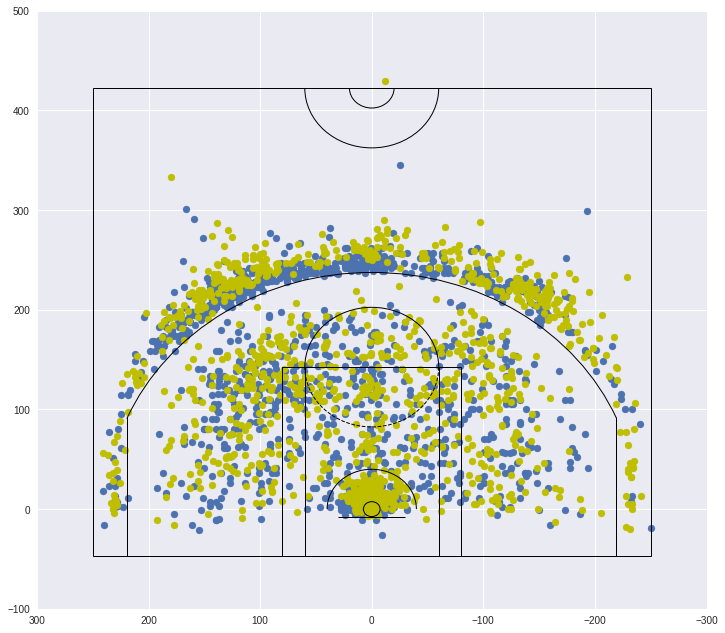

In [37]:
plt.figure(figsize=(12,11))
plt.scatter(OKCshotdata.LOC_X, OKCshotdata.LOC_Y)
plt.scatter(GSWshotdata.LOC_X, GSWshotdata.LOC_Y,c = 'y')
draw_court(outer_lines=True)

plt.xlim(300,-300)
plt.ylim(-100,500)
plt.show()

## Kevin Durant Player Analysis

### Kevin Durant Clutch Analysis

Clutchness is the ability to perform well in high pressure situations. It is especially relevant in sports as a clutch performance can win the game.

In this analysis, we will define a clutch basket as a basket scored in the 4th Quarter as that is the typically the last quarter of the game. We will ignore any quarter past the 4th as the sample size is too small for us to measure clutchness. We want to find if Kevin Durant's clutchness changed from his time on OKC to his time on GSW.

To measure Kevin Durant's clutchness, we will compare his field goal percentage from the first 3 quarter to his last quarter. Then we will take this difference and compare it between his time on OKC and GSW.

In [38]:
for r1, d1 in OKCshotdata.groupby('PERIOD'):
    print("***", r1)
    print(d1.head())


*** 1
           GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0  Shot Chart Detail  0021500013              9     201142  Kevin Durant   
1  Shot Chart Detail  0021500013             15     201142  Kevin Durant   
2  Shot Chart Detail  0021500013             43     201142  Kevin Durant   
3  Shot Chart Detail  0021500013             71     201142  Kevin Durant   
4  Shot Chart Detail  0021500013             98     201142  Kevin Durant   

      TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0  1610612760  Oklahoma City Thunder       1                 11   
1  1610612760  Oklahoma City Thunder       1                 10   
2  1610612760  Oklahoma City Thunder       1                  8   
3  1610612760  Oklahoma City Thunder       1                  5   
4  1610612760  Oklahoma City Thunder       1                  2   

   SECONDS_REMAINING ...          SHOT_ZONE_AREA SHOT_ZONE_RANGE  \
0                 14 ...            Left Side(L)        8-16 ft.  

            GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
44  Shot Chart Detail  0021500022            681     201142  Kevin Durant   
45  Shot Chart Detail  0021500022            690     201142  Kevin Durant   
46  Shot Chart Detail  0021500022            696     201142  Kevin Durant   
47  Shot Chart Detail  0021500022            721     201142  Kevin Durant   
48  Shot Chart Detail  0021500022            728     201142  Kevin Durant   

       TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
44  1610612760  Oklahoma City Thunder       6                  4   
45  1610612760  Oklahoma City Thunder       6                  4   
46  1610612760  Oklahoma City Thunder       6                  3   
47  1610612760  Oklahoma City Thunder       6                  1   
48  1610612760  Oklahoma City Thunder       6                  0   

    SECONDS_REMAINING ...          SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
44                 45 ...               Center(C)         

In [39]:
OKCshotdata.groupby('PERIOD')['SHOT_MADE_FLAG'].mean()

PERIOD
1    0.536160
2    0.510563
3    0.500000
4    0.471014
5    0.285714
6    0.400000
Name: SHOT_MADE_FLAG, dtype: float64

In [40]:
for r2, d2 in GSWshotdata.groupby('PERIOD'):
    print("***", r2)
    print(d2.head())

*** 1
            GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
0   Shot Chart Detail  0021700002             18     201142  Kevin Durant   
1   Shot Chart Detail  0021700002             92     201142  Kevin Durant   
15  Shot Chart Detail  0021700025             11     201142  Kevin Durant   
16  Shot Chart Detail  0021700025             34     201142  Kevin Durant   
17  Shot Chart Detail  0021700025             75     201142  Kevin Durant   

       TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
0   1610612744  Golden State Warriors       1                 10   
1   1610612744  Golden State Warriors       1                  5   
15  1610612744  Golden State Warriors       1                 11   
16  1610612744  Golden State Warriors       1                  9   
17  1610612744  Golden State Warriors       1                  5   

    SECONDS_REMAINING ...          SHOT_ZONE_AREA  SHOT_ZONE_RANGE  \
0                  47 ...   Right Side Center(RC)   

In [41]:
GSWshotdata.groupby('PERIOD')['SHOT_MADE_FLAG'].mean()

PERIOD
1    0.533875
2    0.536332
3    0.474255
4    0.515957
5    0.857143
Name: SHOT_MADE_FLAG, dtype: float64

### Plotting the data

In this exercise, we are going to only compare the last year KD was in OKC and the most recent GSW year as they represent the pinnacle of his career up to date on each team

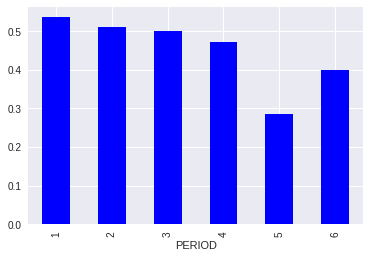

In [42]:
OKCclutch = OKCshotdata.groupby('PERIOD')['SHOT_MADE_FLAG'].mean().plot.bar(color = 'blue')

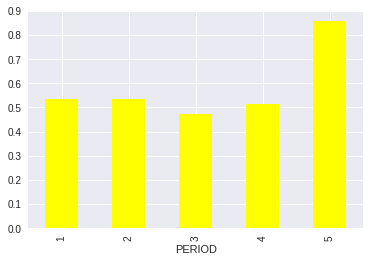

In [43]:
GSWclutch = GSWshotdata.groupby('PERIOD')['SHOT_MADE_FLAG'].mean().plot.bar(color = 'yellow')

His best scoring period looks like it is in overtime, the 5th period. This data may be skewed as the sample size is not very large and so we will only compare the 4th quarter data. The data is similar, but his clutch shooting in GSW seems to be higher. His 4th quarter shooting is 47.1% in OKC and it is 51.6% in GSW. His average in the first 3 quarters on OKC is 51.56%, while his average in GSW is 51.48%. This is remarkably similar. The difference between his 4th quarter shooting and other 3 quarter shooting in OKC is -4.45% while it is .12% higher in GSW. This seems to suggest that Kevin Durant has become more clutch as he moved to the Warriors. This may also be due to many factors including: experience, better teammates, better offensive plays, etc.

### Durant's favorite areas to shoot

Kevin Durant is one of the best scorers of all time. Defenses find it nearly impossible to stop him. We will analyse his favorite areas on the court and see if this has changed from his time on OKC to his time on GSW. Again we will only analyse his most recent performances in this exercise, but you are welcome to play with it.

In [50]:
for r1, d1 in OKCshotdata.groupby('SHOT_ZONE_AREA'):
    print("***", r1)
    print(d1.head())


*** Center(C)
            GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
7   Shot Chart Detail  0021500013            223     201142  Kevin Durant   
8   Shot Chart Detail  0021500013            227     201142  Kevin Durant   
9   Shot Chart Detail  0021500013            237     201142  Kevin Durant   
11  Shot Chart Detail  0021500013            271     201142  Kevin Durant   
13  Shot Chart Detail  0021500013            295     201142  Kevin Durant   

       TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
7   1610612760  Oklahoma City Thunder       2                  3   
8   1610612760  Oklahoma City Thunder       2                  2   
9   1610612760  Oklahoma City Thunder       2                  1   
11  1610612760  Oklahoma City Thunder       3                 10   
13  1610612760  Oklahoma City Thunder       3                  8   

    SECONDS_REMAINING ...  SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE  \
7                  11 ...       Center

In [51]:
OKCshotdata.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean()

SHOT_ZONE_AREA
Center(C)                0.572443
Left Side Center(LC)     0.381944
Left Side(L)             0.514019
Right Side Center(RC)    0.400722
Right Side(R)            0.496644
Name: SHOT_MADE_FLAG, dtype: float64

In [52]:
for r2, d2 in GSWshotdata.groupby('SHOT_ZONE_AREA'):
    print("***", r2)
    print(d2.head())

*** Back Court(BC)
              GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
776   Shot Chart Detail  0021700751            491     201142  Kevin Durant   
875   Shot Chart Detail  0021700864            462     201142  Kevin Durant   
1053  Shot Chart Detail  0021700994            454     201142  Kevin Durant   

         TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
776   1610612744  Golden State Warriors       3                  0   
875   1610612744  Golden State Warriors       3                  0   
1053  1610612744  Golden State Warriors       3                  0   

      SECONDS_REMAINING ...   SHOT_ZONE_AREA  SHOT_ZONE_RANGE SHOT_DISTANCE  \
776                   0 ...   Back Court(BC)  Back Court Shot            43   
875                   0 ...   Back Court(BC)  Back Court Shot            56   
1053                  0 ...   Back Court(BC)  Back Court Shot            56   

     LOC_X LOC_Y SHOT_ATTEMPTED_FLAG  SHOT_MADE_FLAG  GAME_DATE  H

            GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID   PLAYER_NAME  \
2   Shot Chart Detail  0021700002            224     201142  Kevin Durant   
3   Shot Chart Detail  0021700002            249     201142  Kevin Durant   
9   Shot Chart Detail  0021700002            444     201142  Kevin Durant   
22  Shot Chart Detail  0021700025            250     201142  Kevin Durant   
29  Shot Chart Detail  0021700025            605     201142  Kevin Durant   

       TEAM_ID              TEAM_NAME  PERIOD  MINUTES_REMAINING  \
2   1610612744  Golden State Warriors       2                  7   
3   1610612744  Golden State Warriors       2                  6   
9   1610612744  Golden State Warriors       3                  5   
22  1610612744  Golden State Warriors       2                  6   
29  1610612744  Golden State Warriors       4                 10   

    SECONDS_REMAINING ...  SHOT_ZONE_AREA SHOT_ZONE_RANGE SHOT_DISTANCE LOC_X  \
2                  52 ...   Right Side(R)      

In [53]:
GSWshotdata.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean()

SHOT_ZONE_AREA
Back Court(BC)           0.000000
Center(C)                0.597015
Left Side Center(LC)     0.487179
Left Side(L)             0.460870
Right Side Center(RC)    0.384937
Right Side(R)            0.522388
Name: SHOT_MADE_FLAG, dtype: float64

### Plotting the Data

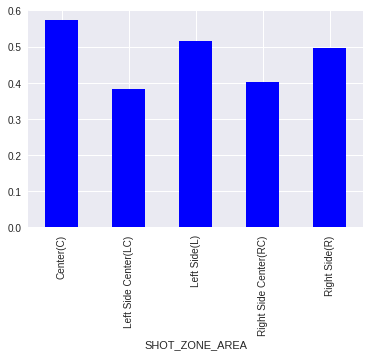

In [54]:
OKCareas = OKCshotdata.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean().plot.bar(color = 'blue')

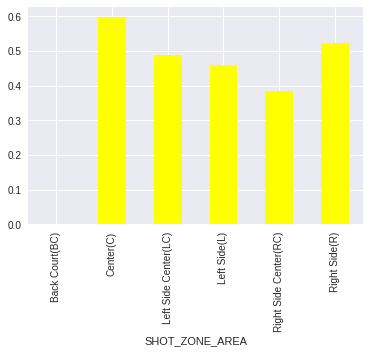

In [55]:
GSWareas = GSWshotdata.groupby('SHOT_ZONE_AREA')['SHOT_MADE_FLAG'].mean().plot.bar(color = 'yellow')

The first thing that is interesting to note about these 2 plots is that Kevin Durant did not attempt a single Back Court shot on OKC. In an interview he confessed that he never attempted these shots to protect his field goal percentage. It is also interesting to note that the center is his favorite spot on the court. It is pretty interesting to see that his shooting ability on the left side center area has improved by roughly 10%. This is the biggest discrepancy between the two groups of data. Overall it seems that if defenses want to try to stop Durant, they need to stop him from shooting it in the center area and force him to the left/right center areas which are his weakest areas.